In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('DIABETICS DETECTION_DATA SET.csv')

# Replace zeros with NaN for specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, pd.NA)

# Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)

# Define features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'DIABETICS DETECTION_DATA SET.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-5-f47a3d3aa22b>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.median(), inplace=True)


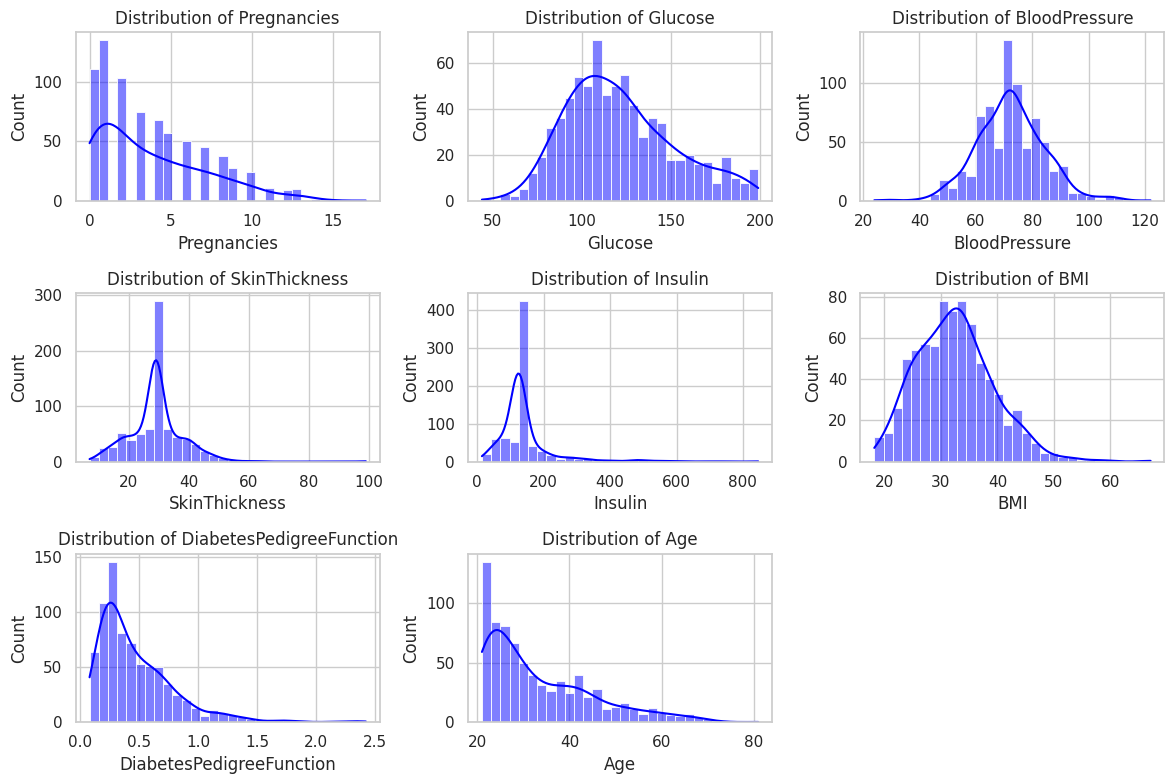

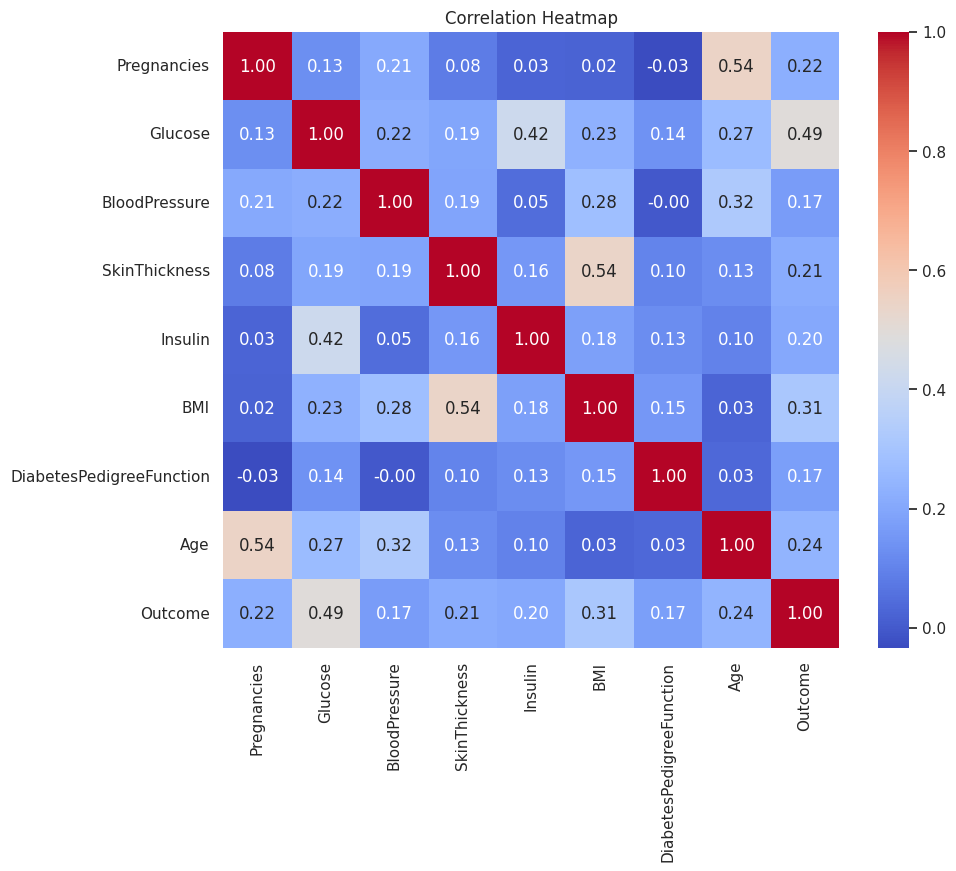

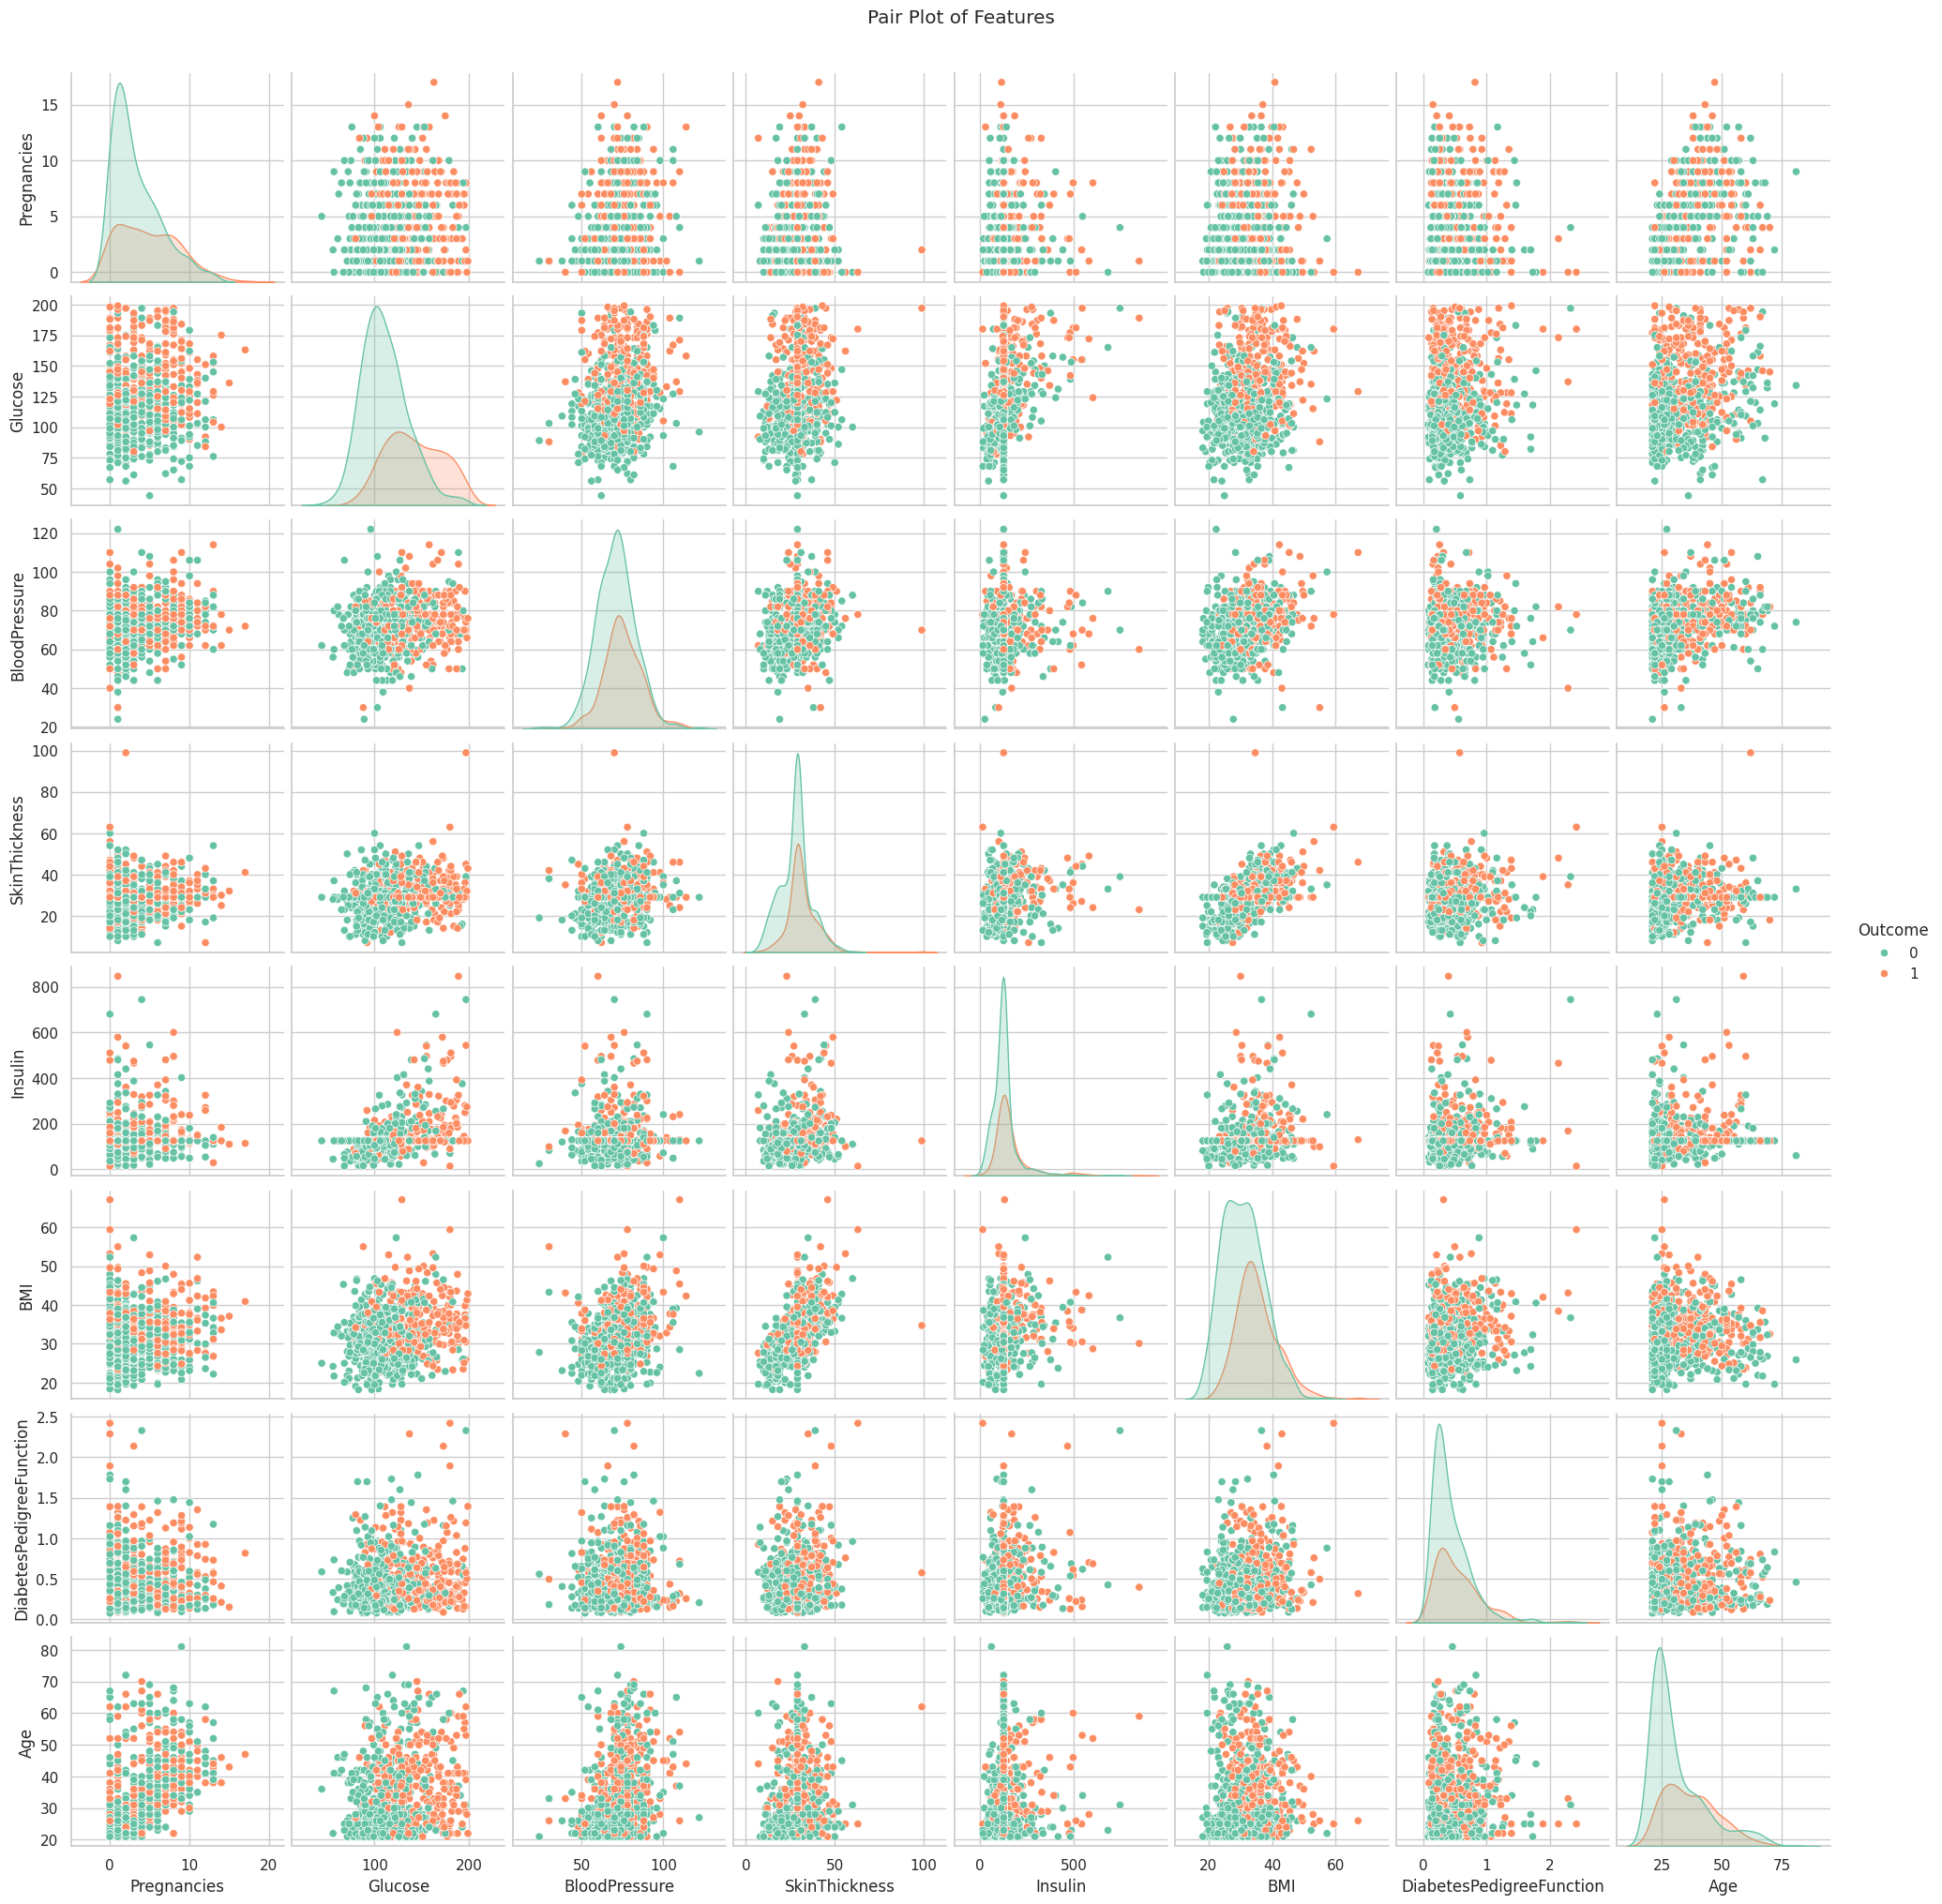

<ipython-input-5-f47a3d3aa22b>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='Set1')
<ipython-input-5-f47a3d3aa22b>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='Set1')
<ipython-input-5-f47a3d3aa22b>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='Set1')
<ipython-input-5-f47a3d3aa22b>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

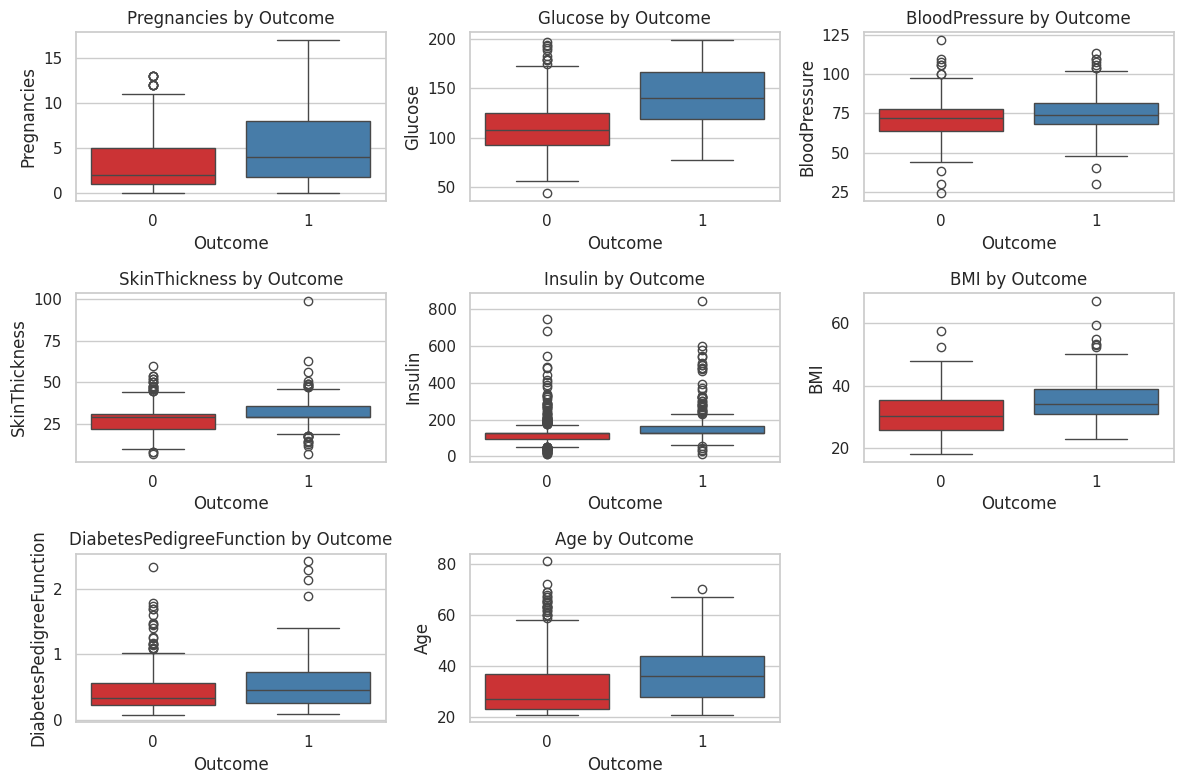

<ipython-input-5-f47a3d3aa22b>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='Set1')


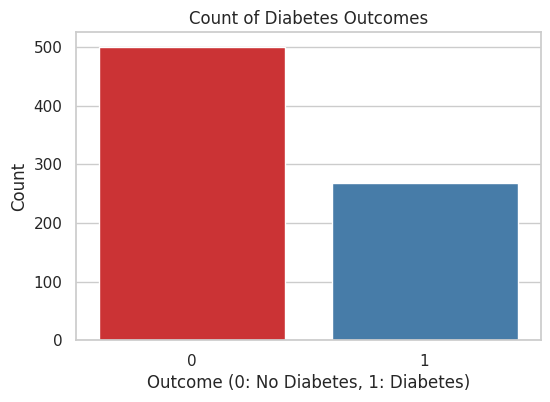

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('DIABETICS DETECTION_DATA SET.csv')

# Replace zeros with NaN for specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, pd.NA)

# Fill missing values with the median for simplicity
data.fillna(data.median(), inplace=True)

# Set a style for Seaborn
sns.set(style="whitegrid")

# 1. Distribution plot for numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# 3. Pair plot for feature relationships
sns.pairplot(data, hue='Outcome', diag_kind='kde', palette='Set2')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# 4. Boxplot for feature distributions by Outcome
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data, palette='Set1')
    plt.title(f"{column} by Outcome")
plt.tight_layout()
plt.show()

# 5. Count plot for Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='Set1')
plt.title("Count of Diabetes Outcomes")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Count")
plt.show()
